# Import Libraries

In [1]:
import types
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from numpy import std

# Import Daten

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d01f9b5de99e4731b707b425e3372df0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SrBxRJAw2UQTYlCpr7-m2GBPopUjYlA1oDDCf7eQ6D9t',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d01f9b5de99e4731b707b425e3372df0.get_object(Bucket='predictiveproductionsalesdemo-donotdelete-pr-yili2qdkzjry49',Key='Produktionsdaten_HISTORISCH.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,DMCODE,GiessenErgebnis,Anlage,OEFFNUNGSZEIT,DRUCKKORREKTUR_SOLL,Heizkreis11Beginn,Heizkreis11Max,Heizkreis11Ende,Heizkreis12Beginn,Heizkreis12Max,...,Kuehlkreis2TempBeginn,Kuehlkreis9Durchfl.Max,Kuehlkreis11Durchfl.Max,Kuehlkreis15TempMax,Kuehlkreis17Durchfl.Max,Kuehlkreis22Durchfl.Max,Kuehlkreis23Durchfl.Max,Kuehlkreis27Durchfl.Ende,Kuehlkreis28Durchfl.Beginn,Thermo5Beginn
0,23349960160106,0,N33,169,0,521.8,528.8,524.6,521.4,529.2,...,335.4,60.6,72.8,331.775,31.9,1.08,0.96,0.72,0.020762,369.1
1,23349970160106,0,N33,167,0,522.0,528.0,524.8,521.2,529.6,...,342.2,60.6,75.9,331.775,32.3,1.04,0.94,0.72,0.000000,375.1
2,23350000160106,0,N33,165,0,522.0,528.0,524.6,521.4,529.0,...,347.8,60.0,74.1,331.775,32.3,1.00,0.92,0.72,0.020762,381.6
3,23350100160106,0,N33,184,0,521.8,528.0,524.6,521.2,528.8,...,352.8,60.6,75.9,331.775,31.4,1.00,0.92,0.72,0.020762,386.6
4,23350110160106,0,N33,155,0,522.0,528.0,524.6,521.8,528.8,...,356.0,59.3,72.5,331.775,31.3,1.00,0.98,0.72,0.020762,390.4


# Explorative Datenanalyse

In [8]:
df.describe()

,DMCODE,GiessenErgebnis,OEFFNUNGSZEIT,DRUCKKORREKTUR_SOLL,Heizkreis11Beginn,Heizkreis11Max,Heizkreis11Ende,Heizkreis12Beginn,Heizkreis12Max,Heizkreis12Ende,Kuehlkreis2TempBeginn,Kuehlkreis9Durchfl.Max,Kuehlkreis11Durchfl.Max,Kuehlkreis15TempMax,Kuehlkreis17Durchfl.Max,Kuehlkreis22Durchfl.Max,Kuehlkreis23Durchfl.Max,Kuehlkreis27Durchfl.Ende,Kuehlkreis28Durchfl.Beginn,Thermo5Beginn
count,1.651000e+03,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,2.357398e+13,0.314961,1234.993943,0.780133,530.664325,538.588976,479.473895,531.458268,540.145003,478.180497,368.797335,49.089340,57.477529,368.762041,33.741429,0.973388,0.821726,0.888010,0.018438,395.904604
std,1.575280e+11,0.464641,6076.692287,2.866228,136.677014,138.702808,132.167196,132.428251,134.904158,129.687848,44.795760,22.535002,26.556820,54.085407,10.815584,0.205797,0.340706,0.188621,0.028736,36.770009
min,2.334996e+13,0.000000,132.000000,-10.000000,53.800000,55.600000,55.600000,69.000000,69.000000,68.600000,196.800000,1.500000,2.000000,306.400000,1.200000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,2.346093e+13,0.000000,179.000000,0.000000,521.600000,528.800000,415.200000,521.400000,528.800000,407.200000,345.600000,57.000000,65.300000,331.775000,32.700000,0.940000,0.900000,0.840000,0.020000,381.600000
50%,2.355197e+13,0.000000,197.000000,0.000000,522.000000,530.400000,524.600000,522.000000,529.600000,524.600000,356.000000,58.000000,70.100000,378.800000,36.600000,0.980000,0.920000,0.920000,0.020762,391.020000
75%,2.374250e+13,1.000000,244.000000,0.000000,607.900000,623.400000,525.000000,607.500000,625.200000,525.000000,418.654545,59.500000,71.600000,396.400000,38.500000,1.060000,1.020000,0.980000,0.020762,400.200000
max,2.382127e+13,1.000000,76559.000000,17.000000,654.800000,665.600000,656.800000,651.400000,666.800000,655.800000,446.200000,70.600000,77.100000,1614.400000,46.700000,1.280000,1.220000,1.120000,0.520000,576.400000


In [9]:
#Verteilung der Zielvariable
df["GiessenErgebnis"].value_counts().to_frame()

,GiessenErgebnis
0,1131
1,520


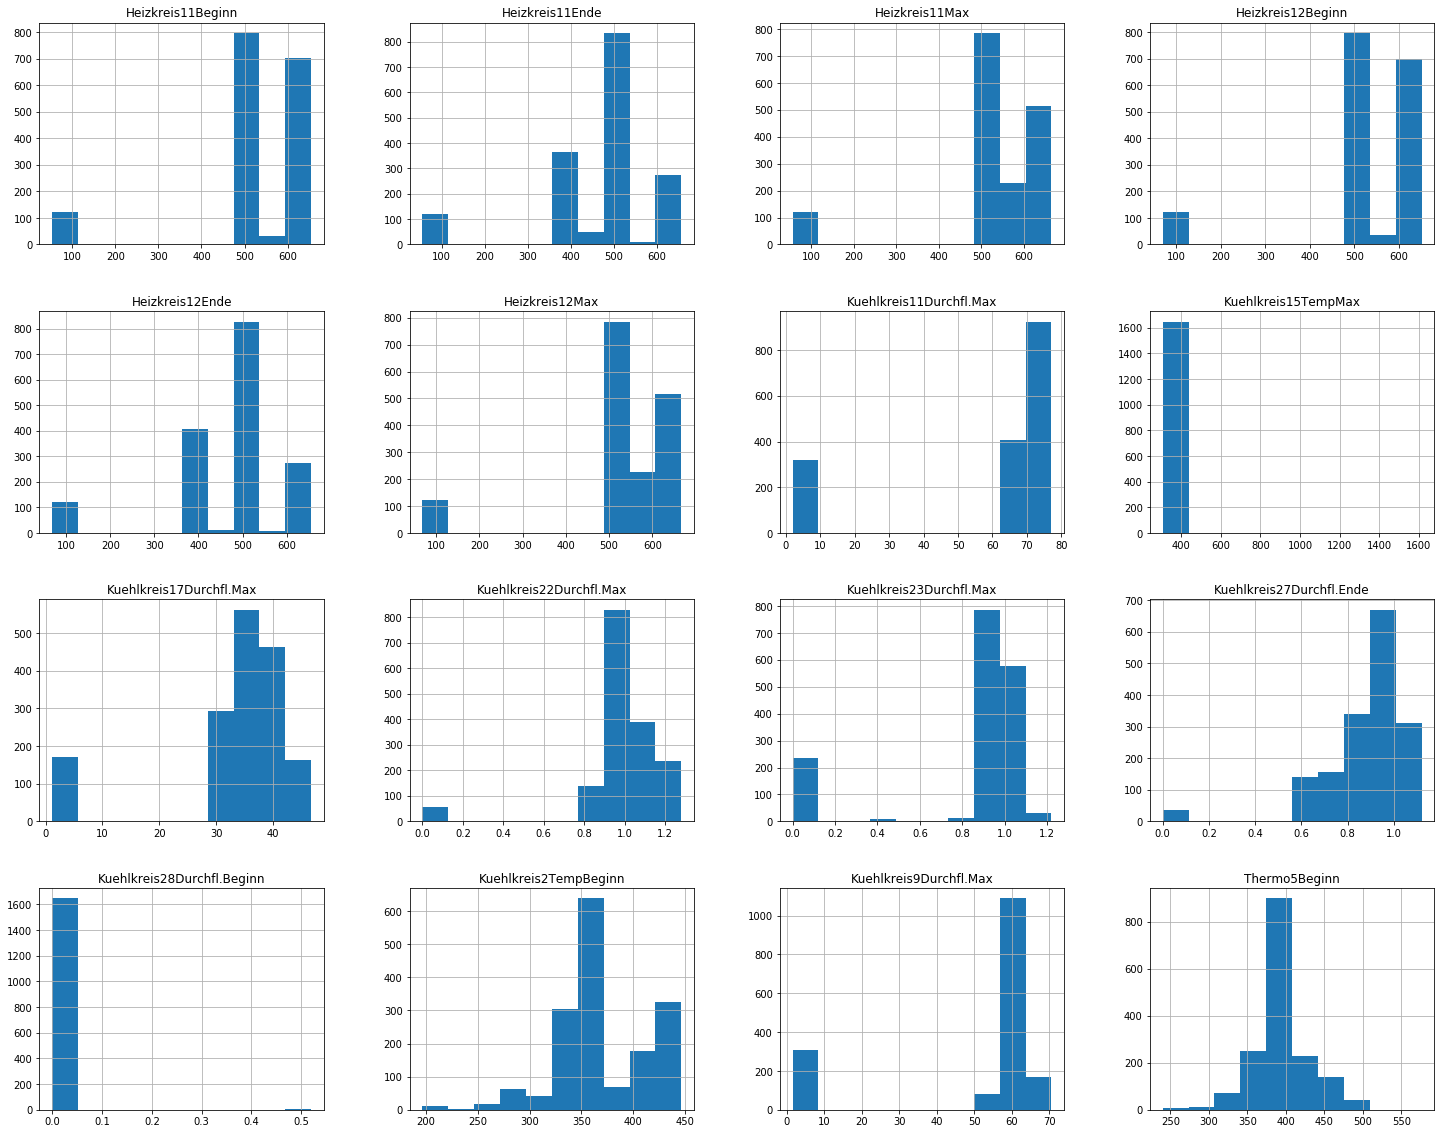

In [10]:
# Visualisierung der Verteilung der Prädiktoren
df[df.dtypes[(df.dtypes=="float64")].index].hist(figsize=[25,20])
plt.show()

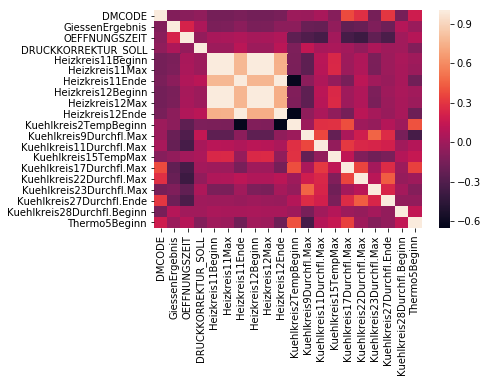

In [11]:
# Korrelationsanalyse
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

# Modellierung

In [12]:
#Definition der Prädiktoren (X) und der Zielvariable (Y)
dflabels = df.drop(['GiessenErgebnis', 'Anlage', 'DMCODE', 'Kuehlkreis15TempMax', 'Thermo5Beginn'], axis =1)
X = np.array(df[['OEFFNUNGSZEIT', 'DRUCKKORREKTUR_SOLL', 'Heizkreis11Beginn', 'Heizkreis11Max', 'Heizkreis11Ende', 'Heizkreis12Beginn',
                 'Heizkreis12Max', 'Heizkreis12Ende', 'Kuehlkreis2TempBeginn', 'Kuehlkreis9Durchfl.Max', 'Kuehlkreis11Durchfl.Max', 'Kuehlkreis17Durchfl.Max', 'Kuehlkreis22Durchfl.Max', 'Kuehlkreis23Durchfl.Max',
                 'Kuehlkreis27Durchfl.Ende', 'Kuehlkreis28Durchfl.Beginn']])
Y = np.array(df['GiessenErgebnis'])

In [13]:
#Train-Test-Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

# Random Forrest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [15]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
# Model Evaluation
model = rf
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.7593073593073593
Accuracy (test set): 0.7459677419354839
AUC: 0.631600021840817
Precision: 0.8867924528301887
Recall: 0.281437125748503
F1 Score: 0.42727272727272725


### Top 5 Einflussvariablen Random Forrest

In [17]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = dflabels.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
OEFFNUNGSZEIT,0.330345
Kuehlkreis17Durchfl.Max,0.136606
Kuehlkreis11Durchfl.Max,0.124349
Kuehlkreis9Durchfl.Max,0.111054
Kuehlkreis22Durchfl.Max,0.077421


# XGBoost

In [18]:
from xgboost import XGBClassifier

In [19]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
# Model Evaluation
model = xgb
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.8926406926406927
Accuracy (test set): 0.8185483870967742
AUC: 0.7541270043499626
Precision: 0.8532110091743119
Recall: 0.5568862275449101
F1 Score: 0.6739130434782609


# Decision Tree

In [21]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=50, criterion='entropy')
clf = clf.fit(X_train, Y_train)

In [22]:
#Model Evaluation
model = clf
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.7887445887445887
Accuracy (test set): 0.7278225806451613
AUC: 0.6488815681706497
Precision: 0.6538461538461539
Recall: 0.40718562874251496
F1 Score: 0.5018450184501846


### Visualisierung des Entscheidungsbaums

In [23]:
!pip install graphviz
!pip install pydotplus

     |████████████████████████████████| 286kB 10.1MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [24]:
import graphviz
import pydotplus

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(dflabels),  
                     class_names=['true' , 'false','NN'],  
                     filled=True, rounded=True,  
                     special_characters=True)

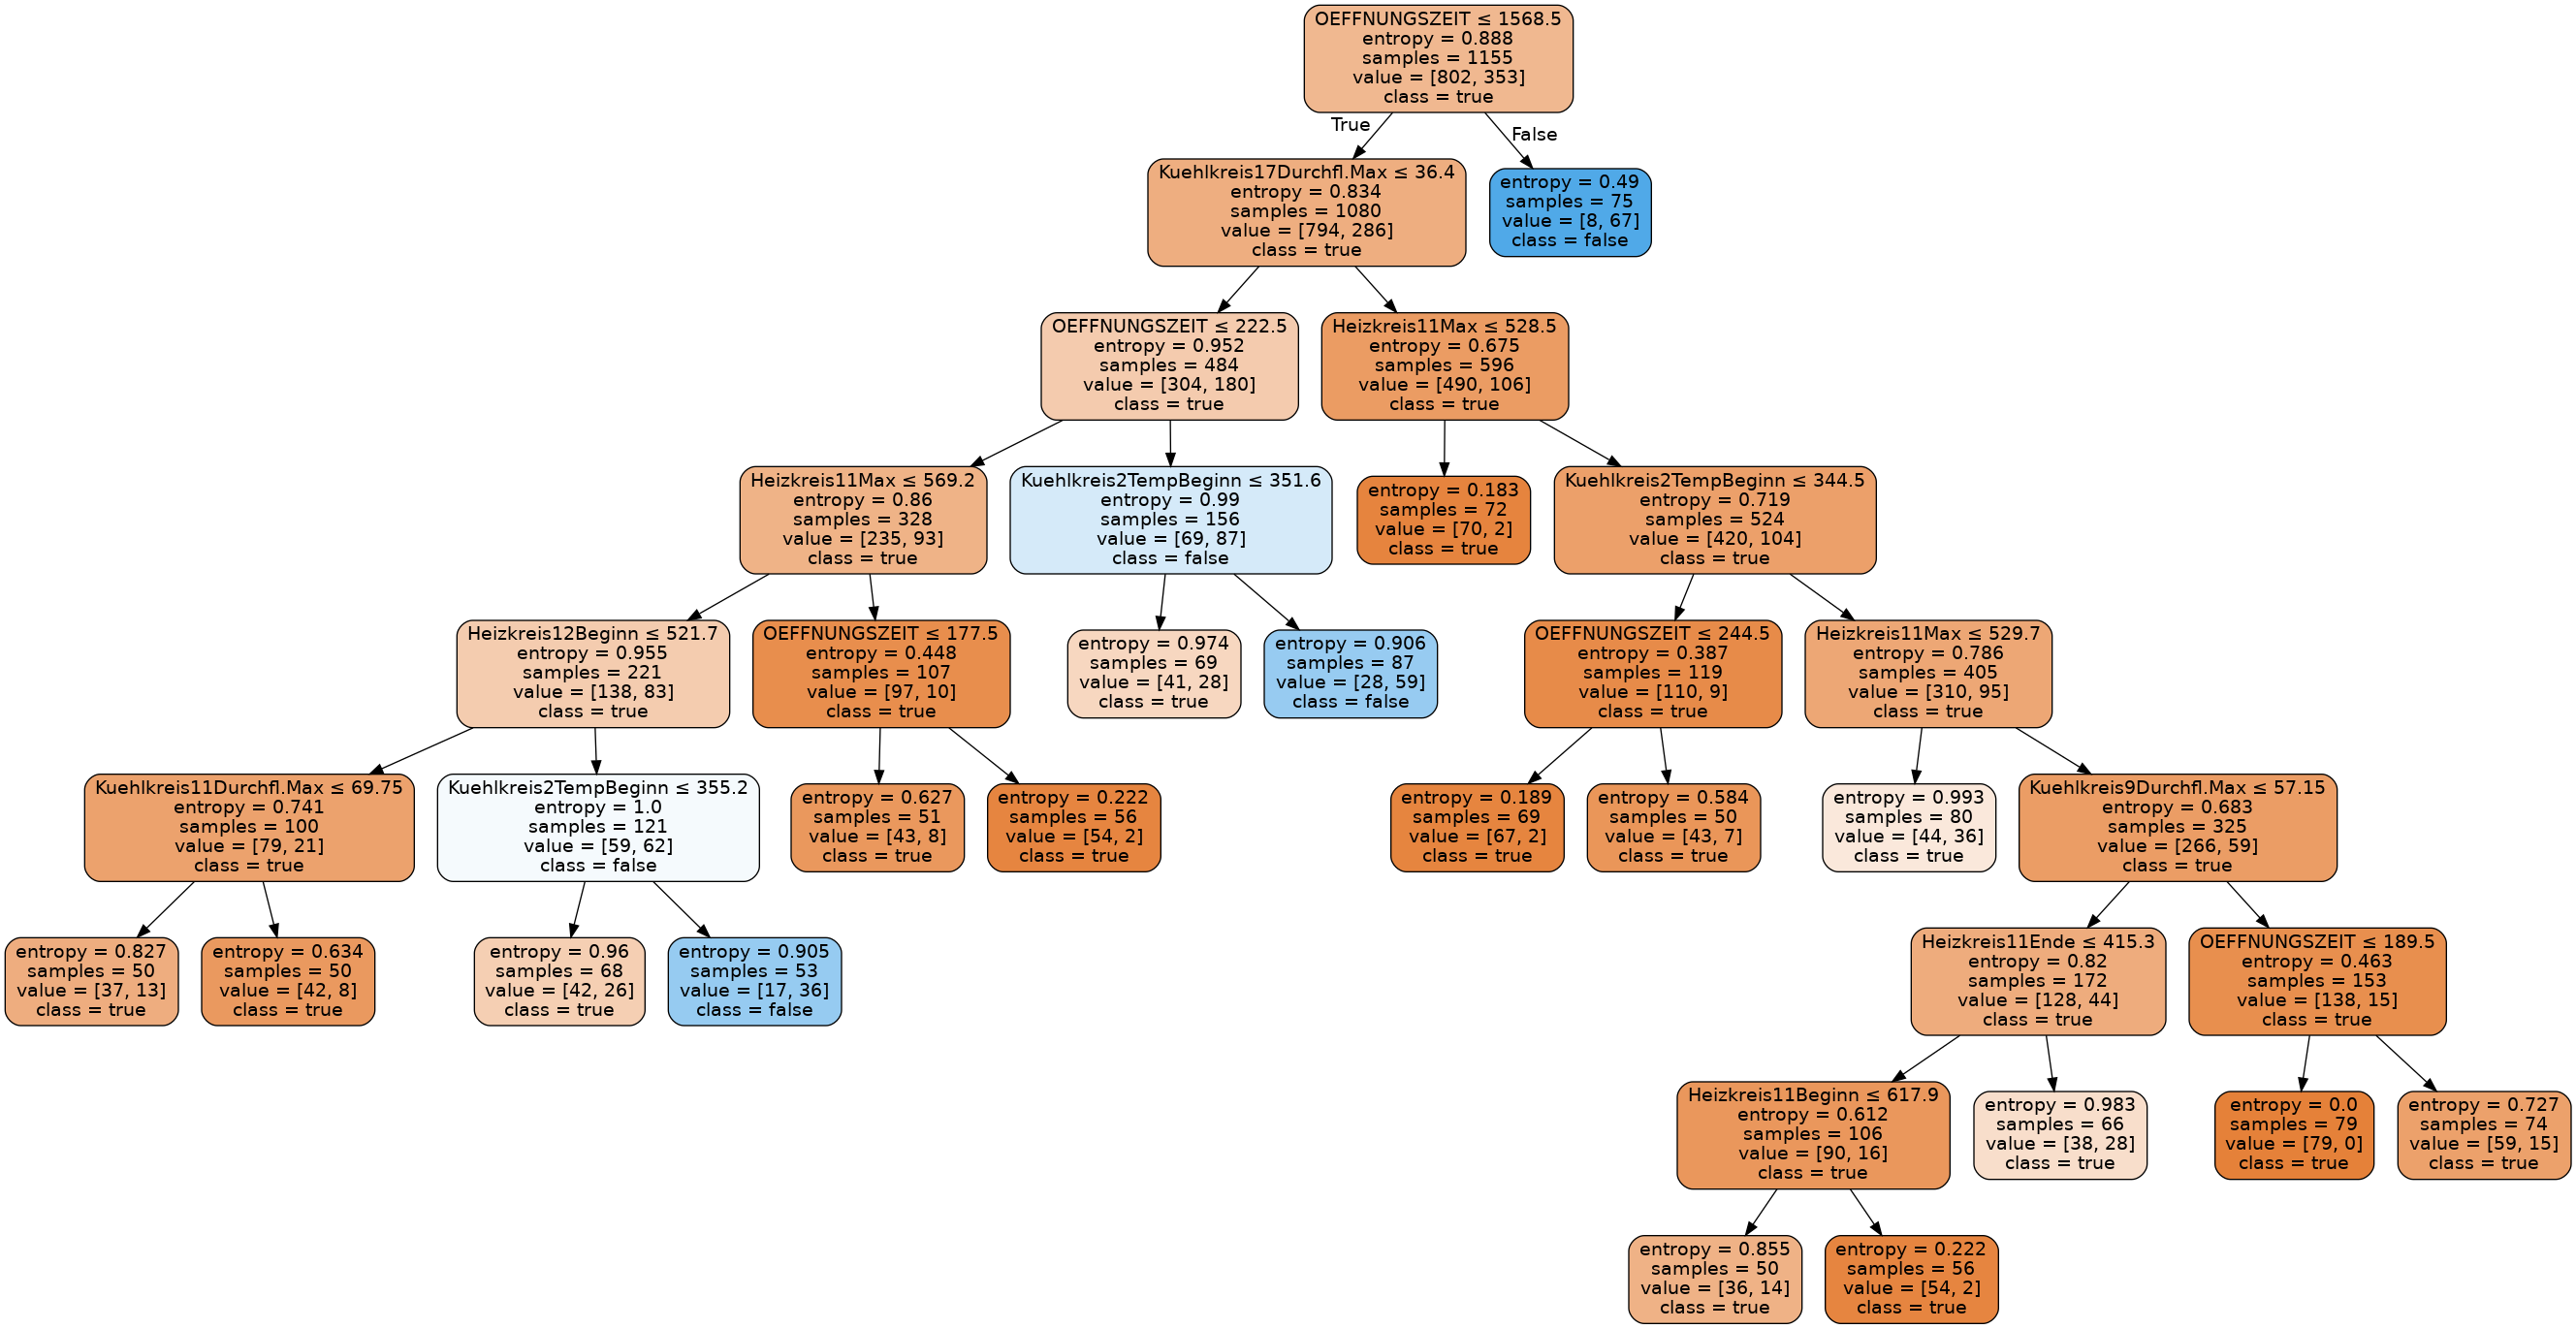

In [26]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Scoring: Anwendung des Modells auf neue Daten

In [27]:
#Laden der neuen Produktsdaten (ohne 'Gießergebnis')
body = client_d01f9b5de99e4731b707b425e3372df0.get_object(Bucket='predictiveproductionsalesdemo-donotdelete-pr-yili2qdkzjry49',Key='Produktionsdaten_NEU.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)
df1.head()

,DMCODE,Anlage,OEFFNUNGSZEIT,DRUCKKORREKTUR_SOLL,Heizkreis11Beginn,Heizkreis11Max,Heizkreis11Ende,Heizkreis12Beginn,Heizkreis12Max,Heizkreis12Ende,Kuehlkreis2TempBeginn,Kuehlkreis9Durchfl.Max,Kuehlkreis11Durchfl.Max,Kuehlkreis15TempMax,Kuehlkreis17Durchfl.Max,Kuehlkreis22Durchfl.Max,Kuehlkreis23Durchfl.Max,Kuehlkreis27Durchfl.Ende,Kuehlkreis28Durchfl.Beginn,Thermo5Beginn
0,23350680160106,N33,19059,0,631.2,658.2,656.8,611.6,655.0,655.0,203.2,3.2,3.0,2305:12:02,1.2,0.00,0.426977,0.02,0.020762,
1,23352860180106,N33,224,0,521.8,528.2,525.0,521.2,529.4,524.6,347.2,58.5,74.1,5:43:55,32.7,1.00,0.920000,0.68,0.020762,6:18:04
2,23352940190106,N33,194,0,521.8,528.0,524.8,521.6,529.0,524.6,352.2,60.5,75.1,5:43:55,31.4,1.00,0.920000,0.66,0.020762,6:25:05
3,23353020190106,N33,1104,0,652.0,655.0,648.4,651.0,655.8,649.0,304.2,3.3,3.4,2305:12:02,32.4,1.00,0.000000,0.68,0.020762,5:38:02
4,23353070190106,N33,188,0,521.6,528.0,525.0,521.6,528.6,524.8,355.4,58.5,73.3,5:43:55,31.4,0.98,0.920000,0.68,0.020762,6:28:07


In [28]:
#Dataprep
dfnew = df1.drop(['Anlage', 'DMCODE', 'Kuehlkreis15TempMax', 'Thermo5Beginn'], axis =1)
X1 = np.array(dfnew[['OEFFNUNGSZEIT', 'DRUCKKORREKTUR_SOLL', 'Heizkreis11Beginn', 'Heizkreis11Max', 'Heizkreis11Ende', 'Heizkreis12Beginn',
                 'Heizkreis12Max', 'Heizkreis12Ende', 'Kuehlkreis2TempBeginn', 'Kuehlkreis9Durchfl.Max', 'Kuehlkreis11Durchfl.Max',
                 'Kuehlkreis17Durchfl.Max', 'Kuehlkreis22Durchfl.Max', 'Kuehlkreis23Durchfl.Max',
                 'Kuehlkreis27Durchfl.Ende', 'Kuehlkreis28Durchfl.Beginn']])

In [29]:
predict = xgb.predict(X1)

In [30]:
proba = xgb.predict_proba(X1)[:,1]

In [31]:
dfnew['Prediction'] = predict
dfnew['Probability'] = proba
dfnew.head()

,OEFFNUNGSZEIT,DRUCKKORREKTUR_SOLL,Heizkreis11Beginn,Heizkreis11Max,Heizkreis11Ende,Heizkreis12Beginn,Heizkreis12Max,Heizkreis12Ende,Kuehlkreis2TempBeginn,Kuehlkreis9Durchfl.Max,Kuehlkreis11Durchfl.Max,Kuehlkreis17Durchfl.Max,Kuehlkreis22Durchfl.Max,Kuehlkreis23Durchfl.Max,Kuehlkreis27Durchfl.Ende,Kuehlkreis28Durchfl.Beginn,Prediction,Probability
0,19059,0,631.2,658.2,656.8,611.6,655.0,655.0,203.2,3.2,3.0,1.2,0.00,0.426977,0.02,0.020762,1,0.983119
1,224,0,521.8,528.2,525.0,521.2,529.4,524.6,347.2,58.5,74.1,32.7,1.00,0.920000,0.68,0.020762,0,0.235678
2,194,0,521.8,528.0,524.8,521.6,529.0,524.6,352.2,60.5,75.1,31.4,1.00,0.920000,0.66,0.020762,0,0.148685
3,1104,0,652.0,655.0,648.4,651.0,655.8,649.0,304.2,3.3,3.4,32.4,1.00,0.000000,0.68,0.020762,0,0.100011
4,188,0,521.6,528.0,525.0,521.6,528.6,524.8,355.4,58.5,73.3,31.4,0.98,0.920000,0.68,0.020762,0,0.152859


In [32]:
dfnew['Prediction'].value_counts().to_frame()

,Prediction
0,216
1,84


# Speichern des trainierten Modells in Watson Machine Learning

In [33]:
wml_credentials = {
                      "apikey":"BoOU9nczq6ZLfTNOJozDBe7EMMKzFwcQzJVuStXVZwWE",
                      "url": "https://us-south.ml.cloud.ibm.com"
}
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)

2020-09-17 20:20:04,104 - ibm_watson_machine_learning.wml_client_error - WARNING - It is mandatory to set the space/project id. Use client.set.default_space(<SPACE_UID>)/client.set.default_project(<PROJECT_UID>) to proceed.


In [34]:
from ibm_watson_machine_learning import APIClient
client = APIClient(wml_credentials)

In [35]:
#deployments in WS Dallas
client.spaces.list(limit=10)

------------------------------------  ----------------------  ------------------------
ID                                    NAME                    CREATED
09a2d28f-28a7-4db1-8ad9-87db090d2aec  Predictive Quality      2020-09-11T22:53:57.973Z
d43483f2-4959-4a92-b046-aeac3a7a5fa0  Learning Tutorial       2020-09-10T20:47:09.036Z
dd60b719-e79b-4dd2-be23-3ee0f093076f  Predictive Forecasting  2020-09-02T17:14:11.659Z
------------------------------------  ----------------------  ------------------------


In [37]:
space_id = '09a2d28f-28a7-4db1-8ad9-87db090d2aec'

In [38]:
client.set.default_space(space_id)

'SUCCESS'

In [39]:
client.data_assets.list()

------------------------  ----------  -----  ------------------------------------
NAME                      ASSET_TYPE  SIZE   ASSET_ID
Produktionsdaten_NEU.csv  data_asset  34807  a15ce3d3-8888-4f6e-867e-6e30eb123101
------------------------  ----------  -----  ------------------------------------


In [56]:
#Show List
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b84-d6ed-5dde-b6a5-3fbdf1665666  base
tensorflow_1.15-py3.6          2b73a275-7cbf-420b-a912-eae7f436e0bc  base
pytorch_1.2-py3.6              2c8ef57

In [58]:
import sklearn as skl
skl.__version__

'0.20.3'

In [59]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
sofware_spec_uid = client.software_specifications.get_id_by_name("scikit-learn_0.20-py3.6")

In [63]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'Decison Tree',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.20',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=clf,
    meta_props=metadata,
    training_data=dflabels,
    training_target=df['GiessenErgebnis'])

In [64]:
client.repository.list_models(limit=5)

------------------------------------  --------------------------  ------------------------  -----------------
ID                                    NAME                        CREATED                   TYPE
b80728ce-b90a-4b0e-9a3f-39ea115700d7  Decison Tree                2020-09-11T22:58:12.002Z  scikit-learn_0.20
f21735a5-af15-40c2-ae75-44542437b2d9  Decison Tree SKlearn Model  2020-09-11T22:57:39.002Z  scikit-learn_0.20
------------------------------------  --------------------------  ------------------------  -----------------


In [65]:
import json

published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

{
  "entity": {
    "label_column": "GiessenErgebnis",
    "software_spec": {
      "id": "09c5a1d0-9c1e-4473-a344-eb7b665ff687",
      "name": "scikit-learn_0.20-py3.6"
    },
    "training_data_references": [
      {
        "connection": {
          "access_key_id": "not_applicable",
          "endpoint_url": "not_applicable",
          "secret_access_key": "not_applicable"
        },
        "id": "1",
        "location": {},
        "schema": {
          "fields": [
            {
              "name": "OEFFNUNGSZEIT",
              "type": "int64"
            },
            {
              "name": "DRUCKKORREKTUR_SOLL",
              "type": "int64"
            },
            {
              "name": "Heizkreis11Beginn",
              "type": "float64"
            },
            {
              "name": "Heizkreis11Max",
              "type": "float64"
            },
            {
              "name": "Heizkreis11Ende",
              "type": "float64"
            },
            {
 